<a href="https://colab.research.google.com/github/rawa-elargab/Bank-churn-rate/blob/main/Bank_Churn_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bank Churn Rate

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

The aim of the data will be predicting the Customer Churn.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/content/Customer-Churn-Records.csv") 

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

###Preprocessing and cleaning

In [5]:
columns_to_drop = ["RowNumber", "CustomerId", "Surname"]
dataset.drop(columns=columns_to_drop, inplace=True)

In [6]:
missing_values = dataset.isnull().sum()
print(missing_values)

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [10]:
categorical_features = ["Geography", "Gender", "Card Type"]
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(drop="first", sparse=False)

In [11]:
for feature in categorical_features:
    if dataset[feature].dtype == "object":
        # If the feature is of object type, use label encoding
        dataset[feature] = label_encoder.fit_transform(dataset[feature])
    else:
        # If the feature is not of object type, use one-hot encoding
        encoded_features = one_hot_encoder.fit_transform(dataset[feature].values.reshape(-1, 1))
        num_encoded_features = encoded_features.shape[1]
        feature_names = [f"{feature}_{i}" for i in range(1, num_encoded_features + 1)]
        encoded_df = pd.DataFrame(encoded_features, columns=feature_names)
        dataset = pd.concat([dataset, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


###EDA

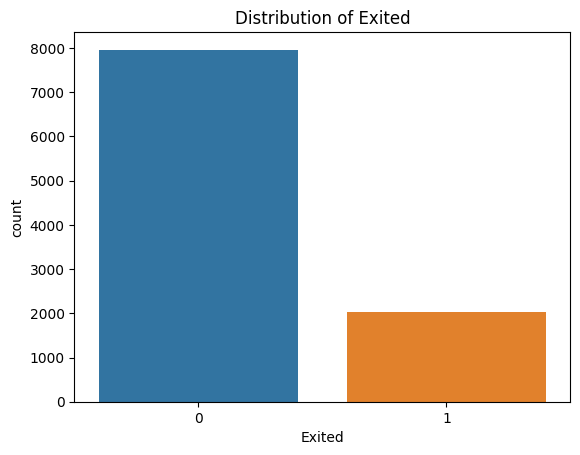

In [19]:
# Distribution of the target variable
sns.countplot(x="Exited", data=dataset)
plt.title("Distribution of Exited")
plt.show()

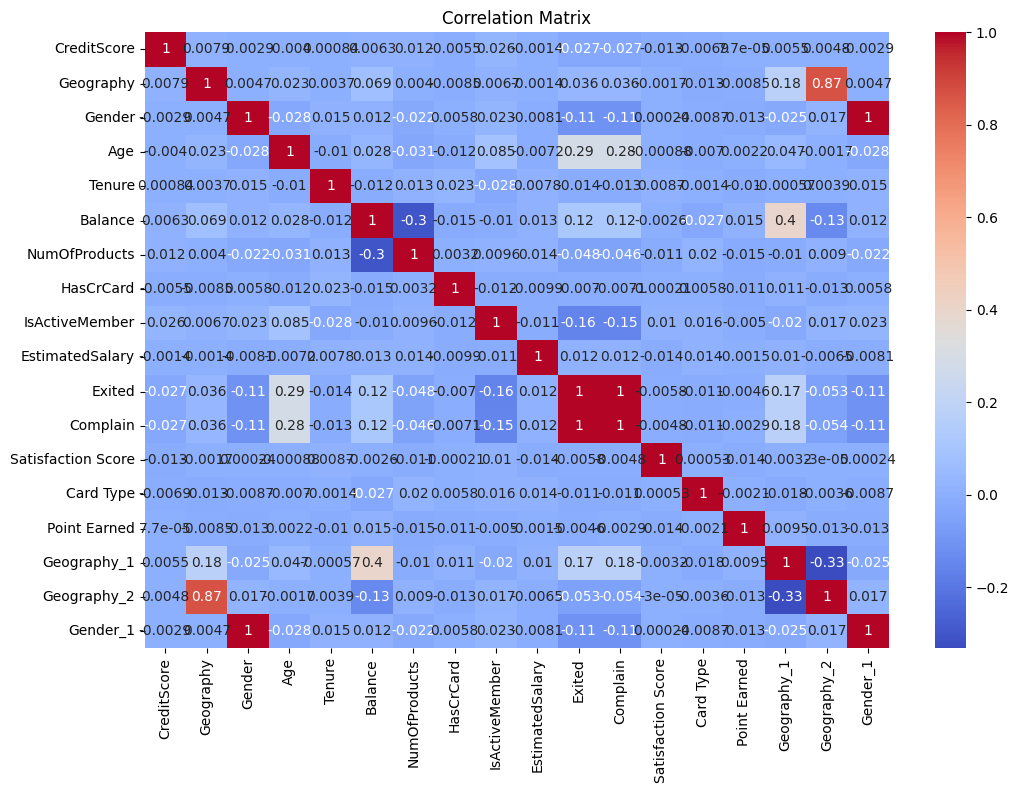

In [20]:
# Correlation matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

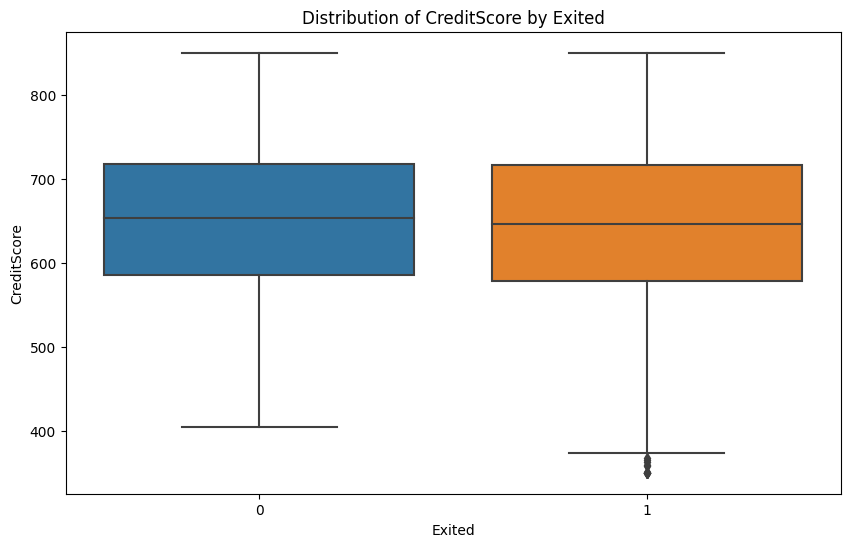

In [21]:
# Distribution of CreditScore by Exited
plt.figure(figsize=(10, 6))
sns.boxplot(x="Exited", y="CreditScore", data=dataset)
plt.title("Distribution of CreditScore by Exited")
plt.show()

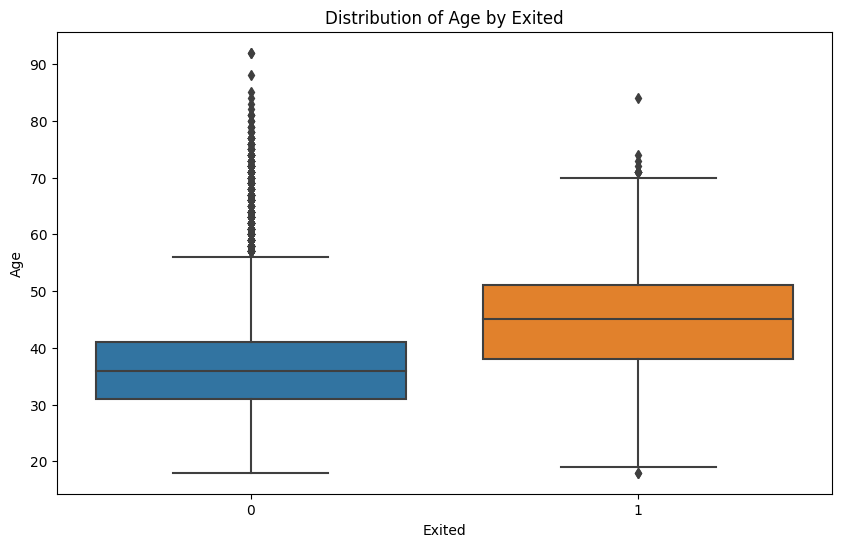

In [22]:
# Distribution of Age by Exited
plt.figure(figsize=(10, 6))
sns.boxplot(x="Exited", y="Age", data=dataset)
plt.title("Distribution of Age by Exited")
plt.show()

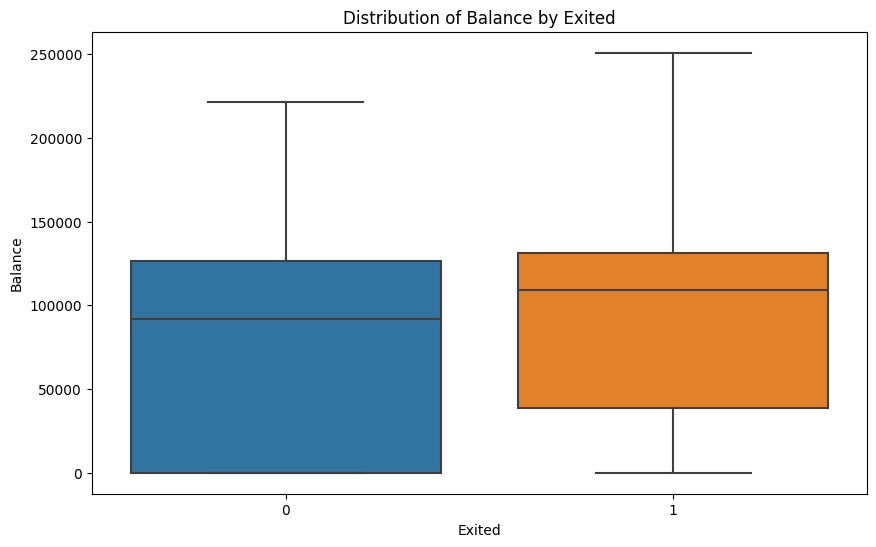

In [23]:

# Distribution of Balance by Exited
plt.figure(figsize=(10, 6))
sns.boxplot(x="Exited", y="Balance", data=dataset)
plt.title("Distribution of Balance by Exited")
plt.show()

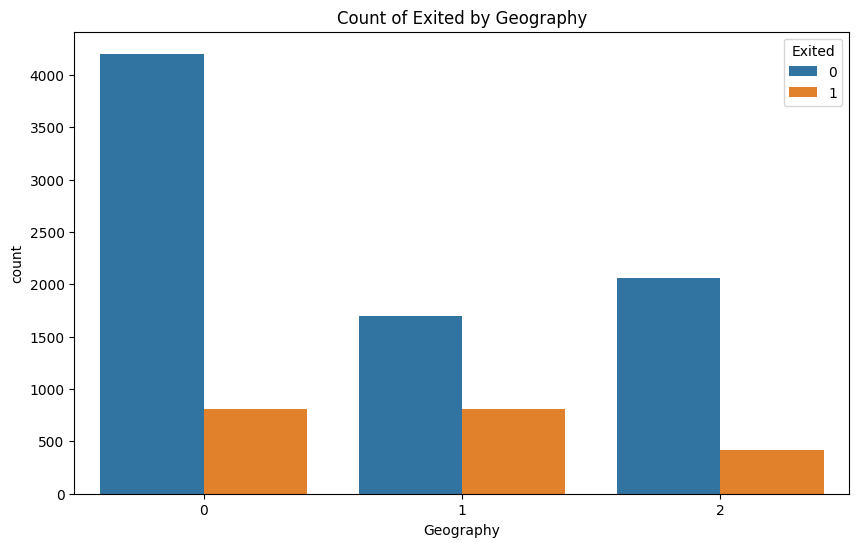

In [24]:
# Count of Exited by Geography
plt.figure(figsize=(10, 6))
sns.countplot(x="Geography", hue="Exited", data=dataset)
plt.title("Count of Exited by Geography")
plt.show()

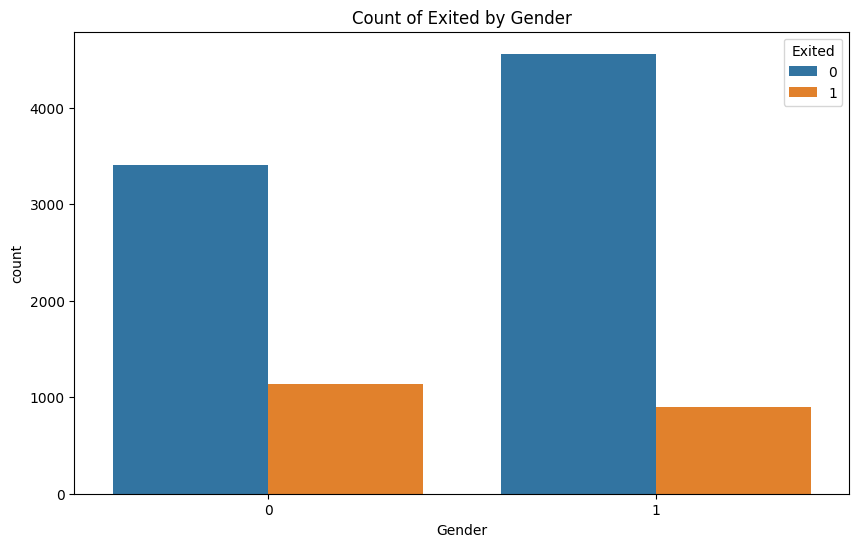

In [25]:
# Count of Exited by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x="Gender", hue="Exited", data=dataset)
plt.title("Count of Exited by Gender")
plt.show()

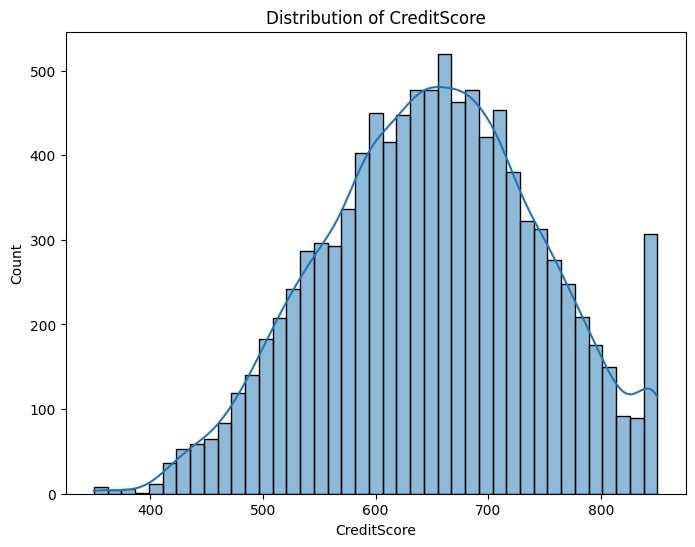

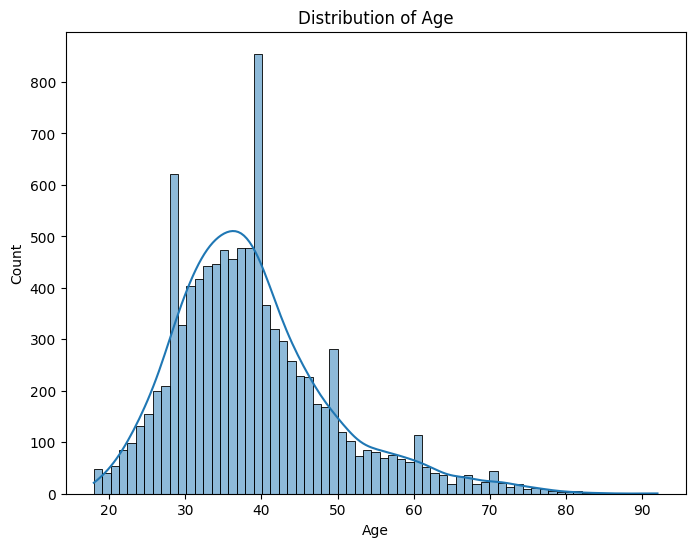

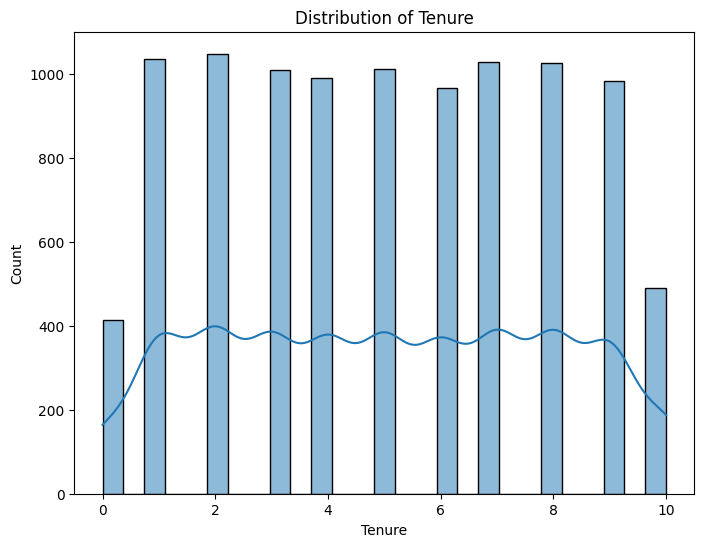

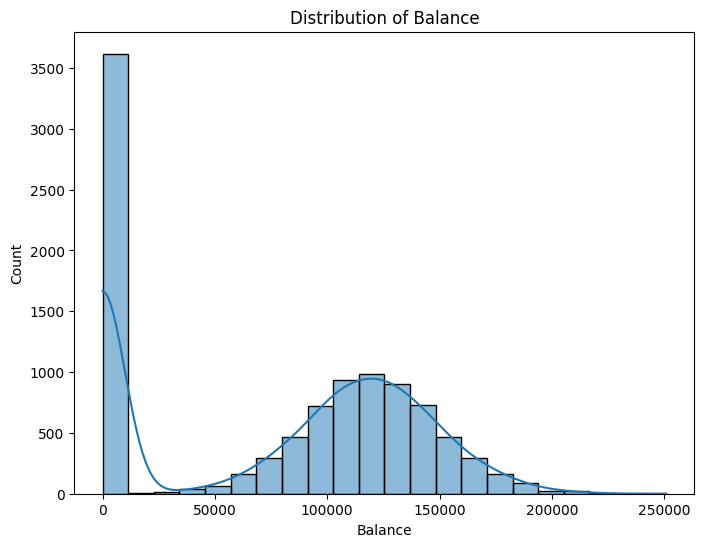

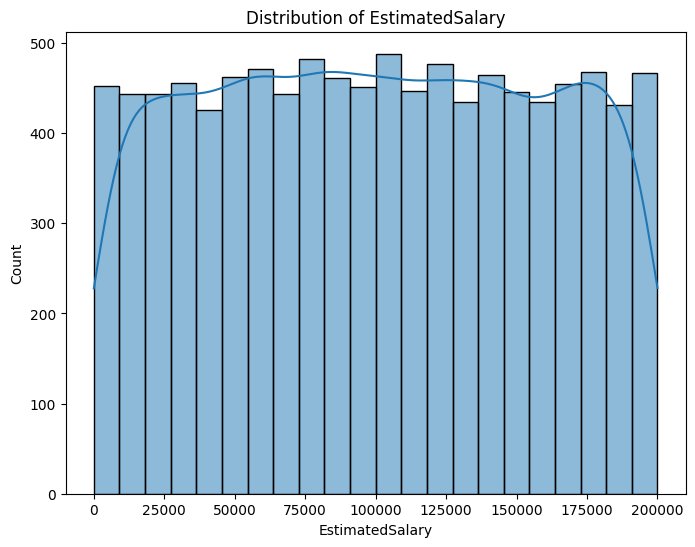

In [26]:
numerical_variables = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

# Plot histograms
for variable in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=dataset, x=variable, kde=True)
    plt.title(f"Distribution of {variable}")
    plt.show()

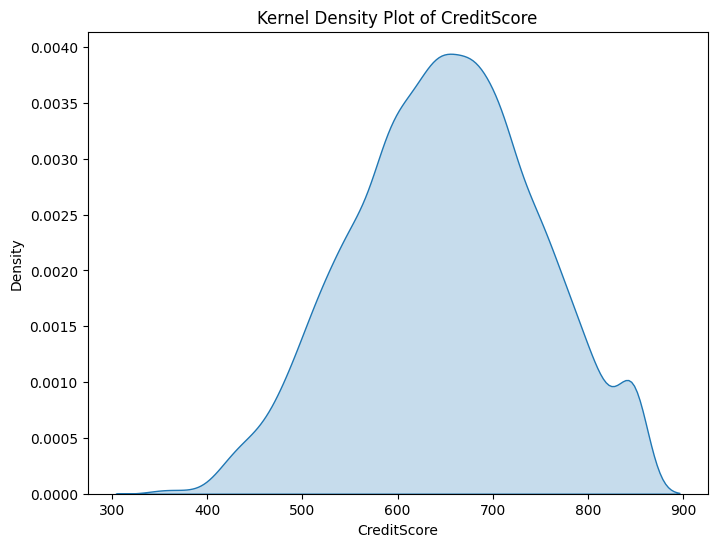

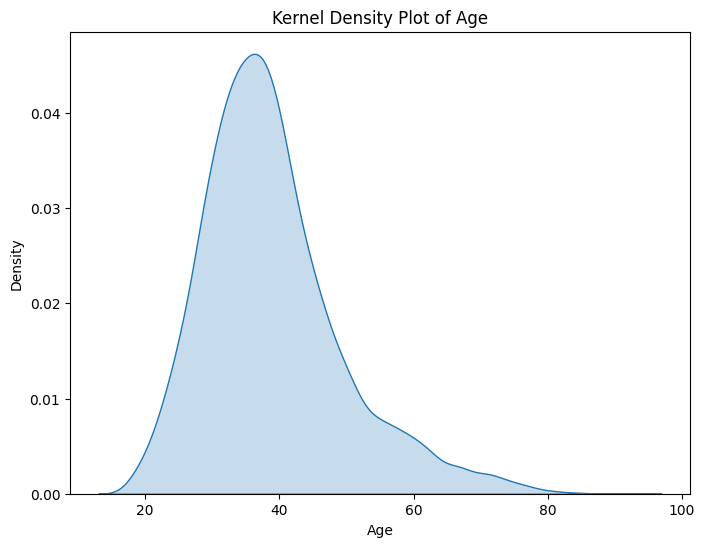

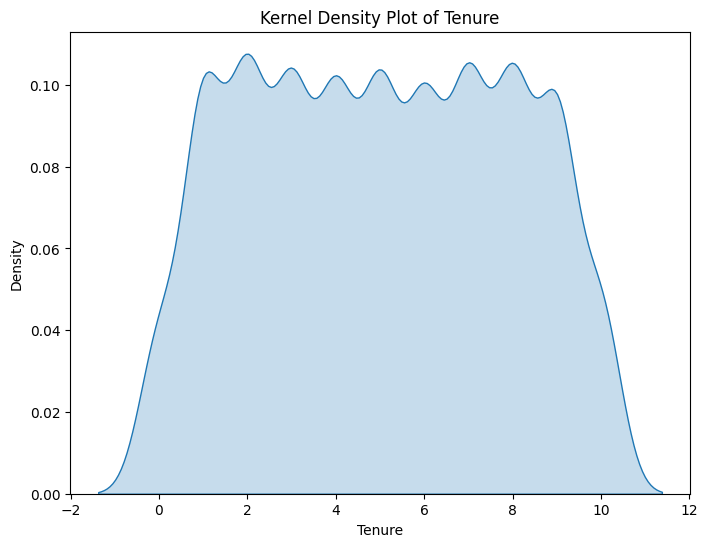

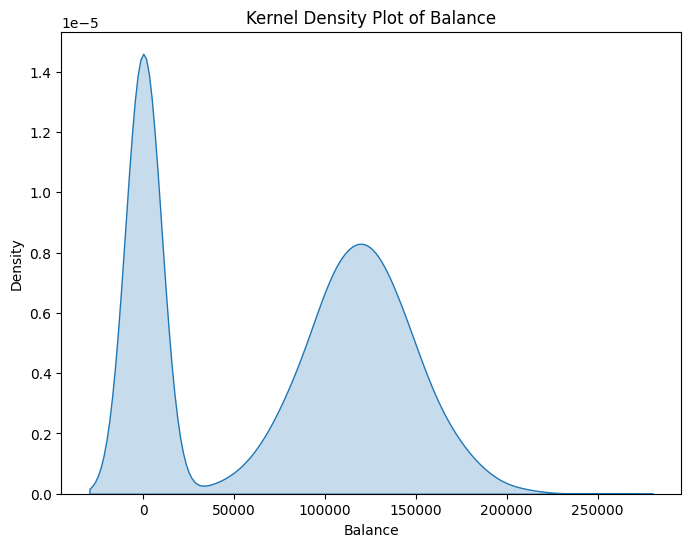

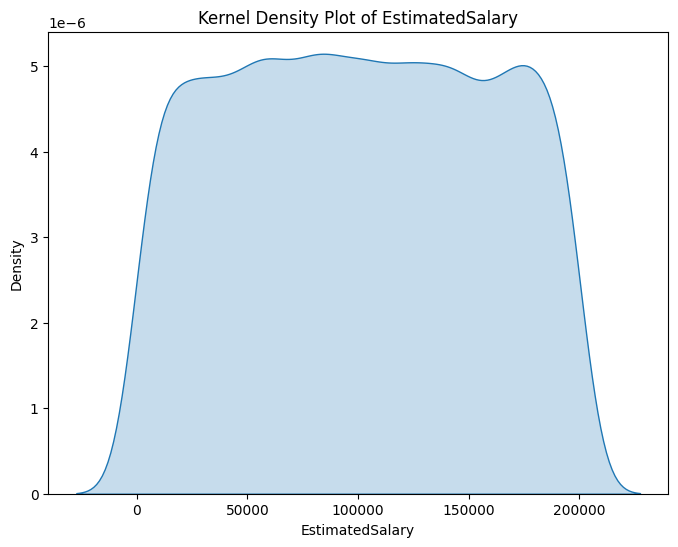

In [27]:
# Plot kernel density plots
for variable in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=dataset, x=variable, fill=True)
    plt.title(f"Kernel Density Plot of {variable}")
    plt.show()

###Churn Rate Modelling

####Logistic Regression

In [28]:
X = dataset.drop("Exited", axis=1)  # Features
y = dataset["Exited"] 

In [30]:
from imblearn.over_sampling import SMOTE


#Perform SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [31]:
print("Original class distribution:")
print(y.value_counts())

print("\nClass distribution after SMOTE oversampling:")
print(pd.Series(y_resampled).value_counts())

Original class distribution:
0    7962
1    2038
Name: Exited, dtype: int64

Class distribution after SMOTE oversampling:
1    7962
0    7962
Name: Exited, dtype: int64


In [35]:
# Adjust the test_size and random_state parameters as needed
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (11146, 17)
Testing set shape: (4778, 17)


In [36]:
model = LogisticRegression()  # Choose the desired machine learning algorithm
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [38]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7367099204688154
Precision: 0.7280966767371602
Recall: 0.7287257019438445
F1 Score: 0.7284110535405872


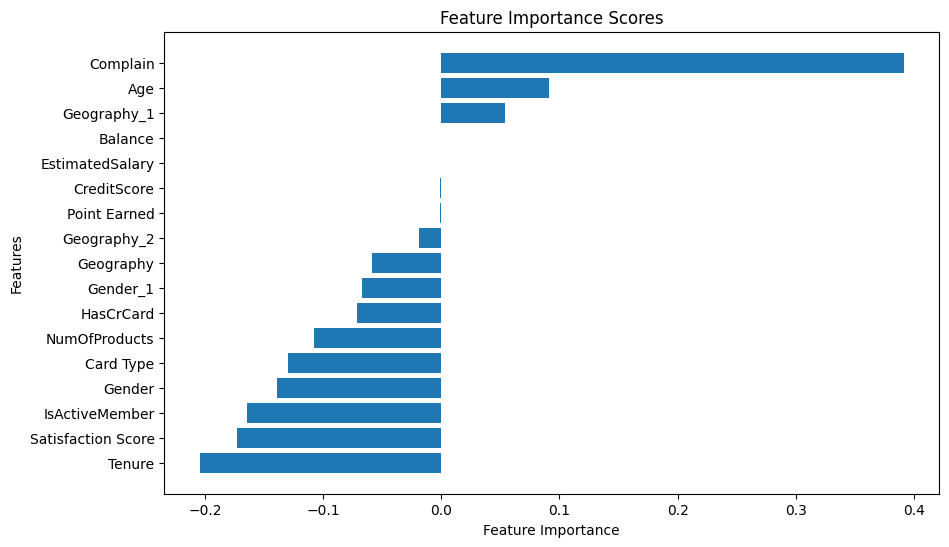

In [39]:
#Interpretation and Feature Importance
# Retrieve feature importance scores from the trained model (if applicable)
if hasattr(model, "coef_"):
    feature_importance = model.coef_[0]
    feature_names = X_train.columns
    sorted_idx = feature_importance.argsort()

    # Plotting feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance Scores")
    plt.show()

####Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [41]:
rf_classifier = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [42]:
y_pred = rf_classifier.predict(X_test)


In [43]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2463
           1       1.00      1.00      1.00      2315

    accuracy                           1.00      4778
   macro avg       1.00      1.00      1.00      4778
weighted avg       1.00      1.00      1.00      4778



In [45]:
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.99865471 0.99910274 0.99820547 0.99910274 0.99820547]
Mean CV Score: 0.9986542256878852


In [46]:
rf_classifier = RandomForestClassifier(class_weight="balanced", min_samples_split=10, random_state=42)

# Train the model with the updated hyperparameters
rf_classifier.fit(X_train, y_train)

# Step 7: Evaluate the updated model
test_score = rf_classifier.score(X_test, y_test)
print("Test Accuracy:", test_score)

Test Accuracy: 0.9983256592716618
